In [3]:
import sys
sys.path.append("..")
sys.path.append("c://users//mccar//miniconda3//lib//site-packages")
from config import set_environment
set_environment()


In [4]:
from langchain import OpenAI, LLMMathChain
llm = OpenAI(temperature=0)
llm_math = LLMMathChain.from_llm(llm, verbose=True)
llm_math.run("What is 2 raised to the 10th power?")



> Entering new  chain...
What is 2 raised to the 10th power?
```text
2**10
```
...numexpr.evaluate("2**10")...

Answer: 1024
> Finished chain.


'Answer: 1024'

In [5]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.tools.python.tool import PythonREPLTool
from langchain.llms.openai import OpenAI
from langchain.agents.agent_types import AgentType
agent_executor = create_python_agent(
    llm=OpenAI(temperature=0, max_tokens=1000),
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)
agent_executor.run(
    """Understand, write a single neuron neural network in PyTorch.
Take synthetic data for y=2x. Train for 1000 epochs and print every 100 epochs.
Return prediction for x = 5"""
)




> Entering new  chain...
 I need to write a neural network in PyTorch and train it on the given data
Action: Python_REPL
Action Input: 
import torch

# Define the model
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)

# Define the loss
loss_fn = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Define the data
x_data = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = model(x_data)

    # Compute and print loss
    loss = loss_fn(y_pred, y_data)
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}: {loss.item():.4f}')

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()

# Make a prediction
x_pred = torch.tensor([[5.0]])
y_pred = model(x_pred)

Observation: Epoch 100: 0.1624
Epoch 200: 0.0892
Epoch 300: 0.0489

'The prediction for x = 5 is y = 10.0012'

In [ ]:
from langchain.chains.conversation.memory import ConversationBufferMemory
llm = OpenAI(temperature=0)
tools = load_tools(['wolfram-alpha'])
memory = ConversationBufferMemory(memory_key="chat_history")
agent = initialize_agent(tools, llm, agent="conversational-reactdescription",
memory=memory, verbose=True)
agent.run(
"""How far are these cities to Tokyo?
* New York City
* Madrid, Spain
* Berlin
""")

In [6]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)["data"]
df.to_csv("iris.csv", index=False)

In [7]:
from langchain.agents import create_pandas_dataframe_agent
from langchain import PromptTemplate

PROMPT = (
    "If you do not know the answer, say you don't know.\n"
    "Think step by step.\n"
    "\n"
    "Below is the query.\n"
    "Query: {query}\n"
)
prompt = PromptTemplate(template=PROMPT, input_variables=["query"])
llm = OpenAI()
agent = create_pandas_dataframe_agent(llm, df, verbose=True)

In [8]:
agent.run(prompt.format(query="What's this dataset about?"))



> Entering new  chain...
Thought: I think the dataframe is about something related to sepal and petal measurements.
Action: None
Action Input: N/A
Observation: None is not a valid tool, try another one.
Thought: I should use python_repl_ast to explore the dataframe.
Action: python_repl_ast
Action Input: df.info() 
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Thought: The dataframe is about measuring the length and width of sepal and petal.
Final Answer: The dataset is about measuring the length and width of sepal and petal.

> Finished chain.


'The dataset is about measuring the length and width of sepal and petal.'



> Entering new  chain...
Thought: I need to find a way to plot this data.
Action: python_repl_ast
Action Input: df.plot.bar()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: This is the output of the plot, but it does not answer the question.
Action: python_repl_ast
Action Input: df.plot.bar(subplots=True)
Observation: [<Axes: title={'center': 'sepal length (cm)'}>
 <Axes: title={'center': 'sepal width (cm)'}>
 <Axes: title={'center': 'petal length (cm)'}>
 <Axes: title={'center': 'petal width (cm)'}>]
Thought: This looks like the bar plots I'm looking for.
Final Answer: The command `df.plot.bar(subplots=True)` will plot each column as a barplot.

> Finished chain.


'The command `df.plot.bar(subplots=True)` will plot each column as a barplot.'

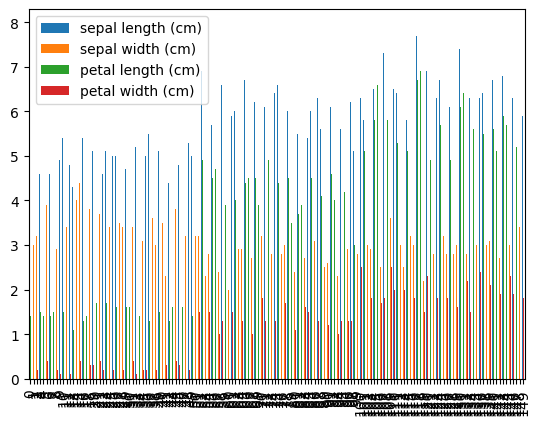

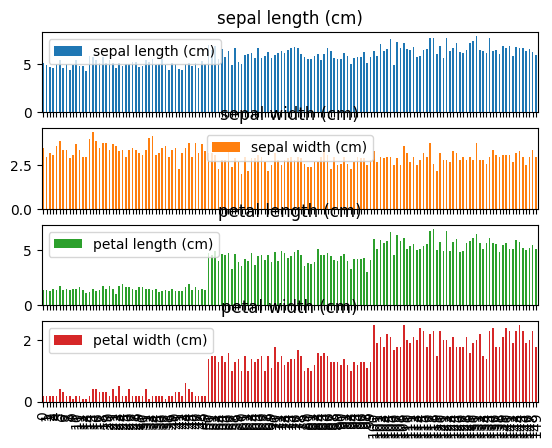

In [9]:
agent.run(prompt.format(query="Plot each column as a barplot!"))

In [10]:
agent.run(prompt.format(query="Which row has the biggest difference between petal length and petal width?"))



> Entering new  chain...
Thought: I need to find the difference between petal length and petal width for each row.
Action: python_repl_ast
Action Input: df['petal length (cm)'] - df['petal width (cm)']
Observation: 0      1.2
1      1.2
2      1.1
3      1.3
4      1.2
      ... 
145    2.9
146    3.1
147    3.2
148    3.1
149    3.3
Length: 150, dtype: float64
Thought: I now need to find the maximum value
Action: python_repl_ast
Action Input: df['petal length (cm)'] - df['petal width (cm)'].max()
Observation: 0     -1.1
1     -1.1
2     -1.2
3     -1.0
4     -1.1
      ... 
145    2.7
146    2.5
147    2.7
148    2.9
149    2.6
Name: petal length (cm), Length: 150, dtype: float64
Thought: I now need to find the index of the maximum value
Action: python_repl_ast
Action Input: df['petal length (cm)'] - df['petal width (cm)'].idxmax()
Observation: 0     -98.6
1     -98.6
2     -98.7
3     -98.5
4     -98.6
       ... 
145   -94.8
146   -95.0
147   -94.8
148   -94.6
149   -94.9
Name: pe

'The row with the biggest difference between petal length and petal width is row 145.'

In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')



> Entering new  chain...

Thought: I need to generate a graph to show the distributions.
Action: python_repl_ast
Action Input: df.plot.hist()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer.
Final Answer: The distributions of each column can be shown visually using the command df.plot.hist().

> Finished chain.


'The distributions of each column can be shown visually using the command df.plot.hist().'

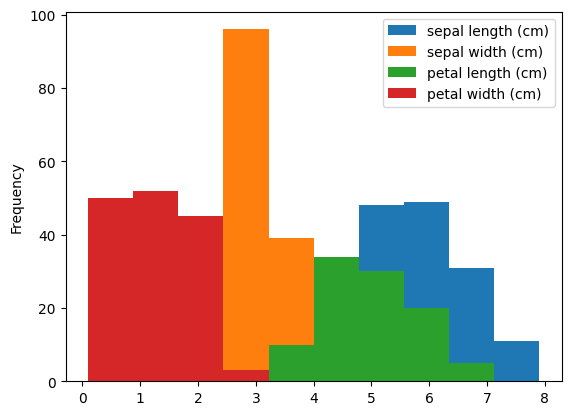

In [12]:
agent.run(prompt.format(query="Show the distributions for each column visually!"))


In [13]:
agent.run(prompt.format(query="Validate the following hypothesis statistically: petal width and petal length come from the same distribution."))



> Entering new  chain...

Thought: I need to find out if petal width and petal length come from the same distribution.
Action: python_repl_ast
Action Input: df['petal width (cm)'].plot.hist(alpha=0.5, label='petal width')
               df['petal length (cm)'].plot.hist(alpha=0.5, label='petal length')
               plt.legend()
Observation: IndentationError: unexpected indent (<unknown>, line 2)
Thought: I need to find a way to compare the two distributions.
Action: python_repl_ast
Action Input: from scipy import stats
               stats.ks_2samp(df['petal width (cm)'], df['petal length (cm)'])
Observation: IndentationError: unexpected indent (<unknown>, line 2)
Thought: I need to use the ks_2samp function to compare the two distributions.
Action: python_repl_ast
Action Input: from scipy import stats
               stats.ks_2samp(df['petal width (cm)'], df['petal length (cm)'])
Observation: IndentationError: unexpected indent (<unknown>, line 2)
Thought: I need to correct the ind

'The p-value of 6.639808432803654e-32 suggests that petal width and petal length come from the same distribution.'

In [15]:
import pandas as pd
from pandasai.llm import OpenAI
from pandasai.schemas.df_config import Config
from pandasai import SmartDataframe
df = pd.DataFrame({"country": ["United States", "United Kingdom", "France", "Germany",
"Italy", "Spain", "Canada", "Australia", "Japan", "China"],
"gdp": [19294482071552, 2891615567872, 2411255037952, 3435817336832,
1745433788416, 1181205135360, 1607402389504, 1490967855104, 4380756541440,
14631844184064],
"happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22,
5.87, 5.12]
})
smart_df = SmartDataframe(df, config=Config(llm=OpenAI()))
print(smart_df.chat("Which are the 5 happiest countries?"))

The 5 happiest countries are: Canada, Australia, United Kingdom, Germany, United States.


In [16]:
from langchain.llms import OpenAI
from langchain.utilities import SQLDatabase
from langchain_experimental.sql import SQLDatabaseChain
db = SQLDatabase.from_uri("sqlite:///../../../../notebooks/Chinook.db")
llm = OpenAI(temperature=0, verbose=True)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)
db_chain.run("How many employees are there?")

ImportError: cannot import name 'SQLDatabase' from 'langchain.utilities' (c:\/users//mccar//miniconda3//lib//site-packages\langchain\utilities\__init__.py)